In [ ]:
from google.colab import files


uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv
Saving valid.csv to valid.csv


In [ ]:
!pip install transformers datasets evaluate accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset

In [ ]:
! pip install torch --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 704.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 998.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
# Import Train set
train_df = pd.read_csv("train.csv", encoding='latin-1')
train_df.head()

,Dataset,FileName,text,label2a,Starting,Ending
0,CMU-MOSEI,jqutn5ou8_0_9,"We have ETF updates now, we have intraday upda...",0,75.131,81.618
1,CMU-MOSEI,72017_2,"And it's basically about , it's about Dracula...",0,3.653,12.056
2,CMU-MOSEI,248400_4,"Nevertheless, the Last Crusade returns to the...",0,13.74,23.271
3,CMU-MOSEI,zv0Jl4TIQDc_5,This is another exercise where we're going to ...,0,29.764,35.633
4,CMU-MOSEI,jjbOD6u7V34_16,They're going to kill us as soon as you leave....,0,77.755,112.508


In [ ]:
# Import Test set
test_df = pd.read_csv("/content/test.csv", encoding='latin-1')
test_df.head()

,Dataset,FileName,text,label2a,Starting,Ending
0,CMU-MOSEI,121128_3,The rat is able to control the boy so that th...,0,19.347,26.912
1,CMU-MOSEI,56006_7,"But it's just, it's just a really gross movie",1,37.566,40.651
2,CMU-MOSEI,nhD9WSEIspQ_16,"So if you watch the mobile space in Japan, you...",0,90.236,98.31
3,CMU-MOSEI,kld9r0iFkWM_2,"Which distribution channels, such as brick and...",0,13.81,20.427
4,CMU-MOSEI,63951_8,"It's full of cliches, it's got a stupid love ...",1,57.102,62.731


In [ ]:
# Import Validation set
valid_df = pd.read_csv("/content/valid.csv", encoding='latin-1')
valid_df.head()

,Dataset,FileName,text,label2a,Starting,Ending
0,CMU-MOSEI,5Tqu1IXJjGY_3,"All it takes is for mum to walk in and say, ""W...",1,13.53061224,19.15011338
1,CMU-MOSEI,mNurUl_Q2UY_9,But that interest will accrue.,0,71.948,74.764
2,CMU-MOSEI,237009_11,", it should be rated junk",1,54.019,56.645
3,CMU-MOSEI,33089_6,"It's got lots of like, really stupid humor bu...",0,40.878,48.893
4,CMU-MOSEI,234053_20,It's a bloody mess at points,1,73.554,76.021


In [ ]:
# Rename Columns
train_df.rename(columns={'label2a': 'label'}, inplace=True)
valid_df.rename(columns={'label2a': 'label'}, inplace=True)
test_df.rename(columns={'label2a': 'label'}, inplace=True)


In [ ]:
# Convert Dataframe to Dataset
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['text', 'label']])
valid_dataset = Dataset.from_pandas(valid_df[['text', 'label']])

In [ ]:
train_dataset[0]

{'text': 'We have ETF updates now, we have intraday updates and after-hours updates.',
 'label': 0}

**DistilBert**

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
tokenized_train_df = train_dataset.map(preprocess_function, batched=True)
tokenized_valid_df = valid_dataset.map(preprocess_function, batched=True)
tokenized_test_df = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/11824 [00:00<?, ? examples/s]

Map:   0%|          | 0/2602 [00:00<?, ? examples/s]

Map:   0%|          | 0/2550 [00:00<?, ? examples/s]

In [ ]:
tokenized_train_df[0]

{'text': 'We have ETF updates now, we have intraday updates and after-hours updates.',
 'label': 0,
 'input_ids': [101,
  2057,
  2031,
  3802,
  2546,
  14409,
  2085,
  1010,
  2057,
  2031,
  26721,
  10259,
  14409,
  1998,
  2044,
  1011,
  2847,
  14409,
  1012,
  102],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "NON-TOXIC", 1: "TOXIC"}
label2id = {"NON-TOXIC": 0, "TOXIC": 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="toxicity_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_df,
    eval_dataset=tokenized_valid_df,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.254000,0.184397,0.925058
2,0.132100,0.205964,0.941583


TrainOutput(global_step=1478, training_loss=0.16325262531698637, metrics={'train_runtime': 134.3829, 'train_samples_per_second': 175.975, 'train_steps_per_second': 10.998, 'total_flos': 273793554597120.0, 'train_loss': 0.16325262531698637, 'epoch': 2.0})

In [ ]:
text = "Eat my shit motherfucker."

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="toxicity_model/checkpoint-1478")
classifier(text)

[{'label': 'TOXIC', 'score': 0.9966838955879211}]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("toxicity_model/checkpoint-1478")

tokenized_test_df = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2550 [00:00<?, ? examples/s]

In [ ]:
pred_output = trainer.predict(tokenized_test_df)

In [ ]:
pred_output.metrics

{'test_loss': 0.1669786423444748,
 'test_accuracy': 0.932156862745098,
 'test_runtime': 2.7645,
 'test_samples_per_second': 922.396,
 'test_steps_per_second': 57.876}

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1908
           1       0.83      0.93      0.87       642

    accuracy                           0.93      2550
   macro avg       0.90      0.93      0.91      2550
weighted avg       0.94      0.93      0.93      2550



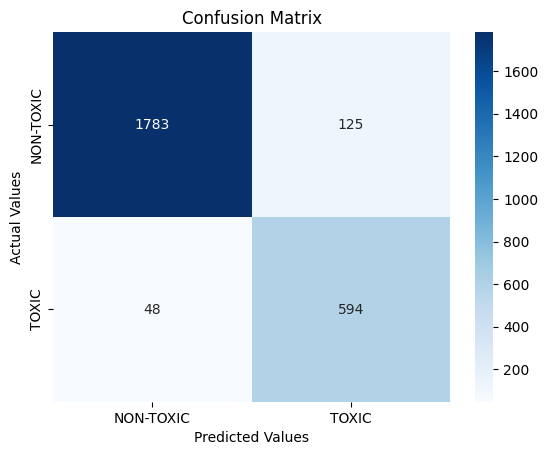

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_preds = np.argmax(pred_output.predictions, axis=1)
y_test = test_dataset['label']

classification_labels = [0,1]
report = classification_report(y_test, y_preds)
print(report)

cm = confusion_matrix(y_test, y_preds)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
ax.yaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
plt.show()

**Roberta**

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
roberta_train_df = train_dataset.map(preprocess_function, batched=True)
roberta_valid_df = valid_dataset.map(preprocess_function, batched=True)
roberta_test_df = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/11824 [00:00<?, ? examples/s]

Map:   0%|          | 0/2602 [00:00<?, ? examples/s]

Map:   0%|          | 0/2550 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "NON-TOXIC", 1: "TOXIC"}
label2id = {"NON-TOXIC": 0, "TOXIC": 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=2, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="roberta_toxicity_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=roberta_train_df,
    eval_dataset=roberta_valid_df,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.275100,0.185788,0.940815
2,0.163500,0.240232,0.944658
3,0.087900,0.267402,0.947733


TrainOutput(global_step=2217, training_loss=0.15736612587508503, metrics={'train_runtime': 410.5611, 'train_samples_per_second': 86.399, 'train_steps_per_second': 5.4, 'total_flos': 803204052029760.0, 'train_loss': 0.15736612587508503, 'epoch': 3.0})

In [ ]:
text = "You are so handsome my friend."

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="roberta_toxicity_model/checkpoint-739")
classifier(text)

[{'label': 'NON-TOXIC', 'score': 0.9957072138786316}]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("roberta_toxicity_model/checkpoint-739")

roberta_test_df = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2550 [00:00<?, ? examples/s]

In [ ]:
pred_output = trainer.predict(roberta_test_df)

In [ ]:
pred_output.metrics

{'test_loss': 0.1731727570295334,
 'test_accuracy': 0.9403921568627451,
 'test_runtime': 5.0224,
 'test_samples_per_second': 507.724,
 'test_steps_per_second': 31.857}

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1908
           1       0.86      0.91      0.88       642

    accuracy                           0.94      2550
   macro avg       0.92      0.93      0.92      2550
weighted avg       0.94      0.94      0.94      2550



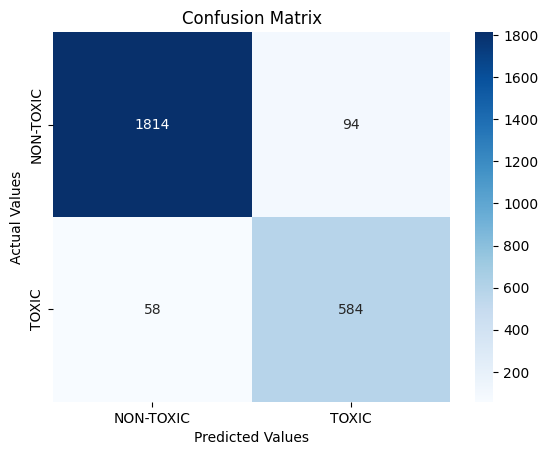

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_preds = np.argmax(pred_output.predictions, axis=1)
y_test = test_dataset['label']

classification_labels = [0,1]
report = classification_report(y_test, y_preds)
print(report)

cm = confusion_matrix(y_test, y_preds)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
ax.yaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
plt.show()

**Electra**

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google/electra-base-discriminator")

tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer

ElectraTokenizerFast(name_or_path='google/electra-base-discriminator', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
electra_train_df = train_dataset.map(preprocess_function, batched=True)
electra_valid_df = valid_dataset.map(preprocess_function, batched=True)
electra_test_df = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/11824 [00:00<?, ? examples/s]

Map:   0%|          | 0/2602 [00:00<?, ? examples/s]

Map:   0%|          | 0/2550 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "NON-TOXIC", 1: "TOXIC"}
label2id = {"NON-TOXIC": 0, "TOXIC": 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "google/electra-base-discriminator", num_labels=2, id2label=id2label, label2id=label2id
)

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="electra_toxicity_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=electra_train_df,
    eval_dataset=electra_valid_df,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

You're using a ElectraTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.258100,0.193555,0.936972
2,0.146500,0.227556,0.941968
3,0.066700,0.254875,0.949270


TrainOutput(global_step=2217, training_loss=0.13887935400977025, metrics={'train_runtime': 401.6914, 'train_samples_per_second': 88.307, 'train_steps_per_second': 5.519, 'total_flos': 816754271380800.0, 'train_loss': 0.13887935400977025, 'epoch': 3.0})

In [ ]:
text = "You are so handsome my friend."

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="electra_toxicity_model/checkpoint-739")
classifier(text)

[{'label': 'NON-TOXIC', 'score': 0.9935923218727112}]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("electra_toxicity_model/checkpoint-739")

electra_test_df = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2550 [00:00<?, ? examples/s]

In [ ]:
pred_output = trainer.predict(electra_test_df)

In [ ]:
pred_output.metrics

{'test_loss': 0.1698904037475586,
 'test_accuracy': 0.9419607843137255,
 'test_runtime': 5.3117,
 'test_samples_per_second': 480.073,
 'test_steps_per_second': 30.122}

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1908
           1       0.87      0.91      0.89       642

    accuracy                           0.94      2550
   macro avg       0.92      0.93      0.92      2550
weighted avg       0.94      0.94      0.94      2550



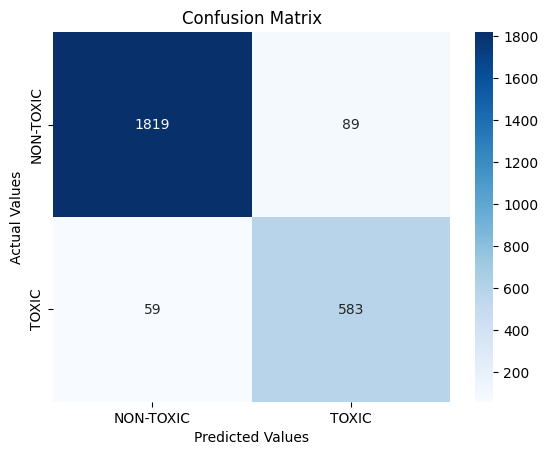

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_preds = np.argmax(pred_output.predictions, axis=1)
y_test = test_dataset['label']

classification_labels = [0,1]
report = classification_report(y_test, y_preds)
print(report)

cm = confusion_matrix(y_test, y_preds)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
ax.yaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
plt.show()